# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [45]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

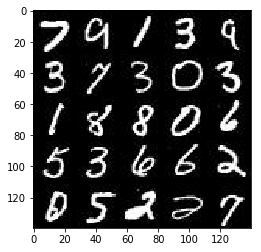

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

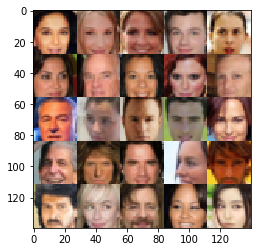

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [46]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [73]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    image_input_real = tf.placeholder(tf.float32,shape=(None,image_width, image_height, image_channels),name='input_real')
    image_input_fake = tf.placeholder(tf.float32,shape=(None,z_dim),name='input_fake')
    learning_rate = tf.placeholder(tf.float32)
    return image_input_real, image_input_fake, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Leaky_relu

In [74]:
def leaky_relu(x, alpha=0.1, name='leaky_relu'):
    return tf.maximum(x, alpha * x, name=name)

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [75]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
#     with tf.variable_scope('discriminator',reuse=reuse):
#         # Hidden layer
#         h1 = tf.layers.dense(images, 128, activation=None)
#         # Leaky ReLU
#         h1 = tf.maximum(0.01 * h1, h1)
        
#         logits = tf.layers.dense(h1, 1, activation=None)
#         logits = tf.reshape(logits,(-1,))
        
#         out = tf.sigmoid(logits)
#   return out, logits

    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28*X
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = tf.maximum(0.1 * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_relu(bn2)
        # 7x7x128

        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_relu(bn2)
        # 4x4x256
        
        x2 = tf.layers.conv2d(relu1, 512, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_relu(bn2)
        # 2x2x512
        
        # Flatten it
        flat = tf.reshape(relu2, (-1, 2*2*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [83]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = leaky_relu(x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = leaky_relu(x2)
        # 14x14x256 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_channel_dim now
        output = tf.tanh(logits)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [84]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.05
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake) * (1 - smooth)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [85]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
#     d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
#     update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)    
#     with tf.control_dependencies(update_ops):
#         g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [86]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [87]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
#     tf.reset_default_graph()
    # Create our input placeholders
    input_real, input_z, l_rate = model_inputs(data_shape[1], data_shape[2], len(data_image_mode), z_dim)
    l_rate = learning_rate
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, l_rate, beta1)
    
    samples = []
    losses = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            i = 0
            for batch_images in get_batches(batch_size):
                i += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # TODO: Train Model
#                 batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
#                 batch_images = batch_images*2 - 1 
                
#                 print('batch_images')
#                 print(batch_images)
#                 print('\n')
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                # show output every 100 batches
                if i % 10 == 0:
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                    "Discriminator Loss: {:.4f}...".format(train_loss_d),
                    "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    losses.append((train_loss_d, train_loss_g))
                    
                if i % 100 == 0:
                    show_generator_output(sess, 1, input_z, data_shape[3], data_image_mode)
                    sample_z = np.random.uniform(-1, 1, size=(16, z_dim))
                    gen_samples = sess.run(
                           generator(input_z, data_shape[3], is_train=False),
                           feed_dict={input_z: sample_z})
                    samples.append(gen_samples)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4673... Generator Loss: 3.7163
Epoch 1/2... Discriminator Loss: 1.3434... Generator Loss: 5.5413
Epoch 1/2... Discriminator Loss: 0.3757... Generator Loss: 3.3514
Epoch 1/2... Discriminator Loss: 2.2160... Generator Loss: 1.5173
Epoch 1/2... Discriminator Loss: 1.3628... Generator Loss: 0.8387
Epoch 1/2... Discriminator Loss: 0.8764... Generator Loss: 0.9433
Epoch 1/2... Discriminator Loss: 1.1751... Generator Loss: 0.5920
Epoch 1/2... Discriminator Loss: 0.3505... Generator Loss: 2.8663
Epoch 1/2... Discriminator Loss: 1.4882... Generator Loss: 3.4464
Epoch 1/2... Discriminator Loss: 0.4341... Generator Loss: 2.6964


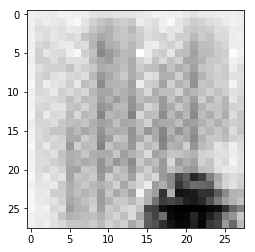

Epoch 1/2... Discriminator Loss: 0.4929... Generator Loss: 2.3206
Epoch 1/2... Discriminator Loss: 0.7346... Generator Loss: 2.8608
Epoch 1/2... Discriminator Loss: 0.7314... Generator Loss: 2.9321
Epoch 1/2... Discriminator Loss: 0.4300... Generator Loss: 2.7545
Epoch 1/2... Discriminator Loss: 0.4111... Generator Loss: 2.5619
Epoch 1/2... Discriminator Loss: 0.7731... Generator Loss: 1.5399
Epoch 1/2... Discriminator Loss: 1.0217... Generator Loss: 1.0722
Epoch 1/2... Discriminator Loss: 1.0431... Generator Loss: 0.8919
Epoch 1/2... Discriminator Loss: 1.0738... Generator Loss: 1.0591
Epoch 1/2... Discriminator Loss: 1.3723... Generator Loss: 1.5642


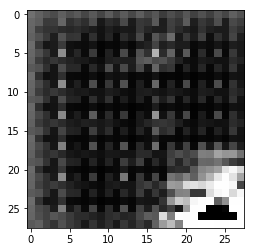

Epoch 1/2... Discriminator Loss: 0.9815... Generator Loss: 1.0389
Epoch 1/2... Discriminator Loss: 0.6772... Generator Loss: 1.6298
Epoch 1/2... Discriminator Loss: 1.1391... Generator Loss: 1.5939
Epoch 1/2... Discriminator Loss: 0.8657... Generator Loss: 1.2563
Epoch 1/2... Discriminator Loss: 1.1972... Generator Loss: 1.5052
Epoch 1/2... Discriminator Loss: 0.9659... Generator Loss: 1.0235
Epoch 1/2... Discriminator Loss: 0.4814... Generator Loss: 2.8379
Epoch 1/2... Discriminator Loss: 0.8962... Generator Loss: 1.7045
Epoch 1/2... Discriminator Loss: 0.6013... Generator Loss: 1.5817
Epoch 1/2... Discriminator Loss: 1.2528... Generator Loss: 1.3377


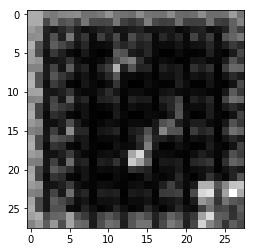

Epoch 1/2... Discriminator Loss: 1.3065... Generator Loss: 1.6287
Epoch 1/2... Discriminator Loss: 1.4824... Generator Loss: 2.0515
Epoch 1/2... Discriminator Loss: 1.0510... Generator Loss: 1.2772
Epoch 1/2... Discriminator Loss: 1.5816... Generator Loss: 0.6503
Epoch 1/2... Discriminator Loss: 1.1085... Generator Loss: 0.7417
Epoch 1/2... Discriminator Loss: 1.2881... Generator Loss: 1.1362
Epoch 1/2... Discriminator Loss: 0.6280... Generator Loss: 1.7792
Epoch 1/2... Discriminator Loss: 0.8314... Generator Loss: 1.2848
Epoch 1/2... Discriminator Loss: 1.5331... Generator Loss: 0.8876
Epoch 1/2... Discriminator Loss: 1.2282... Generator Loss: 0.6745


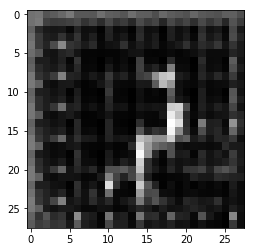

Epoch 1/2... Discriminator Loss: 0.9607... Generator Loss: 1.0423
Epoch 1/2... Discriminator Loss: 0.8795... Generator Loss: 1.4996
Epoch 1/2... Discriminator Loss: 0.6818... Generator Loss: 1.6840
Epoch 1/2... Discriminator Loss: 1.1234... Generator Loss: 1.5019
Epoch 1/2... Discriminator Loss: 1.5375... Generator Loss: 1.6526
Epoch 1/2... Discriminator Loss: 1.5046... Generator Loss: 1.3223
Epoch 1/2... Discriminator Loss: 1.2141... Generator Loss: 1.1811
Epoch 1/2... Discriminator Loss: 1.0290... Generator Loss: 1.2578
Epoch 1/2... Discriminator Loss: 1.1222... Generator Loss: 1.1872
Epoch 1/2... Discriminator Loss: 0.9981... Generator Loss: 1.4948


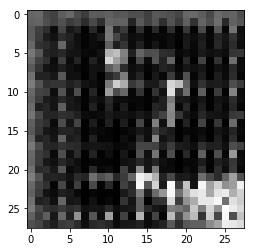

Epoch 1/2... Discriminator Loss: 1.1838... Generator Loss: 0.6562
Epoch 1/2... Discriminator Loss: 1.0498... Generator Loss: 1.0754
Epoch 1/2... Discriminator Loss: 1.1719... Generator Loss: 1.0689
Epoch 1/2... Discriminator Loss: 1.7537... Generator Loss: 0.3914
Epoch 1/2... Discriminator Loss: 1.1594... Generator Loss: 0.8143
Epoch 1/2... Discriminator Loss: 1.0244... Generator Loss: 1.0693
Epoch 1/2... Discriminator Loss: 0.9255... Generator Loss: 1.1468
Epoch 1/2... Discriminator Loss: 1.1290... Generator Loss: 1.2719
Epoch 1/2... Discriminator Loss: 0.9474... Generator Loss: 1.0596
Epoch 1/2... Discriminator Loss: 1.3671... Generator Loss: 1.1787


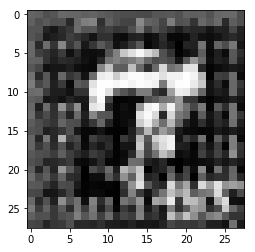

Epoch 1/2... Discriminator Loss: 1.1276... Generator Loss: 1.3635
Epoch 1/2... Discriminator Loss: 0.9411... Generator Loss: 1.0579
Epoch 1/2... Discriminator Loss: 1.3683... Generator Loss: 1.0872
Epoch 1/2... Discriminator Loss: 1.4846... Generator Loss: 1.5596
Epoch 1/2... Discriminator Loss: 1.5766... Generator Loss: 0.5005
Epoch 1/2... Discriminator Loss: 1.2649... Generator Loss: 0.6036
Epoch 1/2... Discriminator Loss: 1.0767... Generator Loss: 0.9354
Epoch 1/2... Discriminator Loss: 0.6102... Generator Loss: 2.1830
Epoch 1/2... Discriminator Loss: 0.8392... Generator Loss: 1.4501
Epoch 1/2... Discriminator Loss: 0.6887... Generator Loss: 2.4009


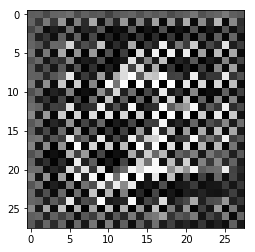

Epoch 1/2... Discriminator Loss: 0.8875... Generator Loss: 1.4593
Epoch 1/2... Discriminator Loss: 0.6409... Generator Loss: 3.6565
Epoch 1/2... Discriminator Loss: 1.4872... Generator Loss: 0.6324
Epoch 1/2... Discriminator Loss: 1.3185... Generator Loss: 0.8838
Epoch 1/2... Discriminator Loss: 1.0650... Generator Loss: 0.8963
Epoch 1/2... Discriminator Loss: 1.0106... Generator Loss: 1.1742
Epoch 1/2... Discriminator Loss: 0.8810... Generator Loss: 2.8710
Epoch 1/2... Discriminator Loss: 1.2674... Generator Loss: 1.0413
Epoch 1/2... Discriminator Loss: 0.8820... Generator Loss: 1.5412
Epoch 1/2... Discriminator Loss: 0.7694... Generator Loss: 1.5469


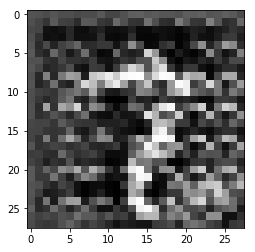

Epoch 1/2... Discriminator Loss: 0.4555... Generator Loss: 2.9177
Epoch 1/2... Discriminator Loss: 0.6548... Generator Loss: 1.7326
Epoch 1/2... Discriminator Loss: 1.6625... Generator Loss: 1.2085
Epoch 1/2... Discriminator Loss: 1.1848... Generator Loss: 1.4615
Epoch 1/2... Discriminator Loss: 1.0858... Generator Loss: 1.3562
Epoch 1/2... Discriminator Loss: 1.0854... Generator Loss: 1.1795
Epoch 1/2... Discriminator Loss: 0.9758... Generator Loss: 0.9357
Epoch 1/2... Discriminator Loss: 1.0017... Generator Loss: 1.5355
Epoch 1/2... Discriminator Loss: 0.7003... Generator Loss: 2.1266
Epoch 1/2... Discriminator Loss: 1.3043... Generator Loss: 0.8920


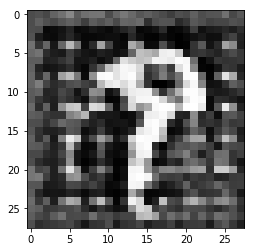

Epoch 1/2... Discriminator Loss: 1.5250... Generator Loss: 0.6671
Epoch 1/2... Discriminator Loss: 1.1139... Generator Loss: 0.8469
Epoch 1/2... Discriminator Loss: 0.9881... Generator Loss: 1.2280
Epoch 2/2... Discriminator Loss: 0.8261... Generator Loss: 1.4376
Epoch 2/2... Discriminator Loss: 1.0357... Generator Loss: 1.3646
Epoch 2/2... Discriminator Loss: 0.9099... Generator Loss: 1.8523
Epoch 2/2... Discriminator Loss: 1.0230... Generator Loss: 1.0924
Epoch 2/2... Discriminator Loss: 1.8354... Generator Loss: 1.8454
Epoch 2/2... Discriminator Loss: 1.1271... Generator Loss: 1.3379
Epoch 2/2... Discriminator Loss: 0.8323... Generator Loss: 1.3286
Epoch 2/2... Discriminator Loss: 1.1100... Generator Loss: 1.0288
Epoch 2/2... Discriminator Loss: 0.9204... Generator Loss: 1.0659
Epoch 2/2... Discriminator Loss: 0.9860... Generator Loss: 1.2023


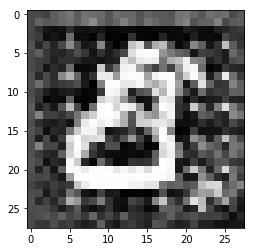

Epoch 2/2... Discriminator Loss: 0.9069... Generator Loss: 1.2034
Epoch 2/2... Discriminator Loss: 1.3070... Generator Loss: 1.0577
Epoch 2/2... Discriminator Loss: 1.4117... Generator Loss: 0.5047
Epoch 2/2... Discriminator Loss: 1.3120... Generator Loss: 1.4096
Epoch 2/2... Discriminator Loss: 0.8582... Generator Loss: 1.3300
Epoch 2/2... Discriminator Loss: 1.0450... Generator Loss: 1.1193
Epoch 2/2... Discriminator Loss: 0.7746... Generator Loss: 1.5010
Epoch 2/2... Discriminator Loss: 1.2627... Generator Loss: 1.2640
Epoch 2/2... Discriminator Loss: 1.5383... Generator Loss: 0.9001
Epoch 2/2... Discriminator Loss: 1.2086... Generator Loss: 0.6815


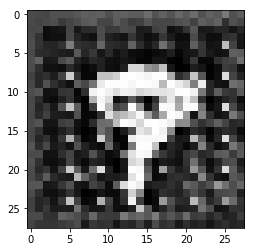

Epoch 2/2... Discriminator Loss: 1.0053... Generator Loss: 1.2171
Epoch 2/2... Discriminator Loss: 1.5134... Generator Loss: 1.5792
Epoch 2/2... Discriminator Loss: 1.6719... Generator Loss: 1.0652
Epoch 2/2... Discriminator Loss: 1.1215... Generator Loss: 0.7471
Epoch 2/2... Discriminator Loss: 0.9429... Generator Loss: 0.9988
Epoch 2/2... Discriminator Loss: 0.6712... Generator Loss: 1.6247
Epoch 2/2... Discriminator Loss: 1.1258... Generator Loss: 1.4200
Epoch 2/2... Discriminator Loss: 1.0127... Generator Loss: 1.0157
Epoch 2/2... Discriminator Loss: 1.0536... Generator Loss: 1.0063
Epoch 2/2... Discriminator Loss: 0.9335... Generator Loss: 1.6509


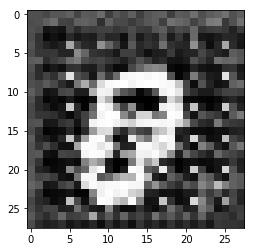

Epoch 2/2... Discriminator Loss: 0.7436... Generator Loss: 1.5342
Epoch 2/2... Discriminator Loss: 1.4407... Generator Loss: 1.6832
Epoch 2/2... Discriminator Loss: 1.2084... Generator Loss: 1.2573
Epoch 2/2... Discriminator Loss: 1.0509... Generator Loss: 1.0230
Epoch 2/2... Discriminator Loss: 0.9495... Generator Loss: 1.7203
Epoch 2/2... Discriminator Loss: 0.9331... Generator Loss: 1.1156
Epoch 2/2... Discriminator Loss: 1.3387... Generator Loss: 1.3953
Epoch 2/2... Discriminator Loss: 1.1332... Generator Loss: 1.3724
Epoch 2/2... Discriminator Loss: 1.0035... Generator Loss: 0.8963
Epoch 2/2... Discriminator Loss: 0.8832... Generator Loss: 1.3309


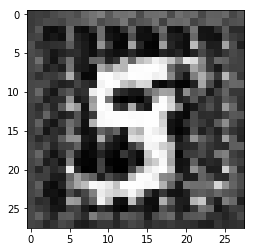

Epoch 2/2... Discriminator Loss: 0.7939... Generator Loss: 1.2168
Epoch 2/2... Discriminator Loss: 1.1258... Generator Loss: 1.3595
Epoch 2/2... Discriminator Loss: 1.1553... Generator Loss: 1.3100
Epoch 2/2... Discriminator Loss: 1.4694... Generator Loss: 0.9463
Epoch 2/2... Discriminator Loss: 1.0573... Generator Loss: 0.7855
Epoch 2/2... Discriminator Loss: 1.1306... Generator Loss: 0.7200
Epoch 2/2... Discriminator Loss: 1.1487... Generator Loss: 1.1539
Epoch 2/2... Discriminator Loss: 1.0695... Generator Loss: 0.7297
Epoch 2/2... Discriminator Loss: 1.5299... Generator Loss: 0.7524
Epoch 2/2... Discriminator Loss: 1.2121... Generator Loss: 0.9578


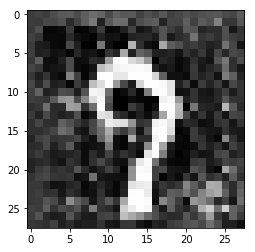

Epoch 2/2... Discriminator Loss: 0.7075... Generator Loss: 1.3851
Epoch 2/2... Discriminator Loss: 0.8587... Generator Loss: 1.7108
Epoch 2/2... Discriminator Loss: 1.0135... Generator Loss: 0.8720
Epoch 2/2... Discriminator Loss: 1.2604... Generator Loss: 1.2753
Epoch 2/2... Discriminator Loss: 1.3635... Generator Loss: 1.5322
Epoch 2/2... Discriminator Loss: 1.0817... Generator Loss: 1.0021
Epoch 2/2... Discriminator Loss: 0.8603... Generator Loss: 1.2511
Epoch 2/2... Discriminator Loss: 0.7458... Generator Loss: 1.6605
Epoch 2/2... Discriminator Loss: 1.0981... Generator Loss: 0.9533
Epoch 2/2... Discriminator Loss: 1.1579... Generator Loss: 1.0193


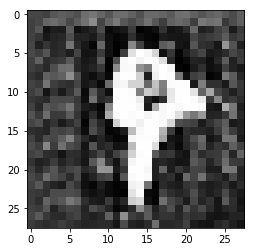

Epoch 2/2... Discriminator Loss: 0.9455... Generator Loss: 1.0938
Epoch 2/2... Discriminator Loss: 1.1721... Generator Loss: 0.8328
Epoch 2/2... Discriminator Loss: 1.0065... Generator Loss: 0.8404
Epoch 2/2... Discriminator Loss: 0.6652... Generator Loss: 1.6994
Epoch 2/2... Discriminator Loss: 0.7783... Generator Loss: 1.3043
Epoch 2/2... Discriminator Loss: 1.0376... Generator Loss: 2.5815
Epoch 2/2... Discriminator Loss: 1.4948... Generator Loss: 0.6427
Epoch 2/2... Discriminator Loss: 1.6462... Generator Loss: 0.5782
Epoch 2/2... Discriminator Loss: 0.8434... Generator Loss: 1.1110
Epoch 2/2... Discriminator Loss: 0.9759... Generator Loss: 1.6771


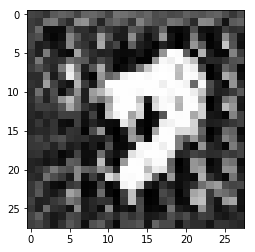

Epoch 2/2... Discriminator Loss: 0.8517... Generator Loss: 1.6415
Epoch 2/2... Discriminator Loss: 1.1724... Generator Loss: 1.0115
Epoch 2/2... Discriminator Loss: 0.7064... Generator Loss: 1.3401
Epoch 2/2... Discriminator Loss: 1.1516... Generator Loss: 1.4042
Epoch 2/2... Discriminator Loss: 1.1325... Generator Loss: 1.7372
Epoch 2/2... Discriminator Loss: 0.8585... Generator Loss: 1.1449
Epoch 2/2... Discriminator Loss: 0.7880... Generator Loss: 1.1914
Epoch 2/2... Discriminator Loss: 1.0862... Generator Loss: 1.2753
Epoch 2/2... Discriminator Loss: 1.1300... Generator Loss: 1.3661
Epoch 2/2... Discriminator Loss: 0.7543... Generator Loss: 1.4193


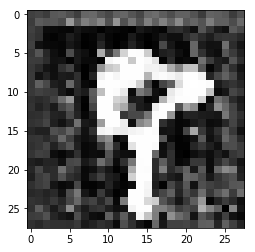

Epoch 2/2... Discriminator Loss: 0.6740... Generator Loss: 1.4559
Epoch 2/2... Discriminator Loss: 1.3778... Generator Loss: 1.0743
Epoch 2/2... Discriminator Loss: 0.8807... Generator Loss: 1.1867
Epoch 2/2... Discriminator Loss: 0.9787... Generator Loss: 1.6114
Epoch 2/2... Discriminator Loss: 0.6757... Generator Loss: 1.6672
Epoch 2/2... Discriminator Loss: 1.4137... Generator Loss: 0.6910
Epoch 2/2... Discriminator Loss: 1.2914... Generator Loss: 0.8453
Epoch 2/2... Discriminator Loss: 1.2782... Generator Loss: 0.8454
Epoch 2/2... Discriminator Loss: 0.9404... Generator Loss: 1.3199
Epoch 2/2... Discriminator Loss: 0.8643... Generator Loss: 1.3000


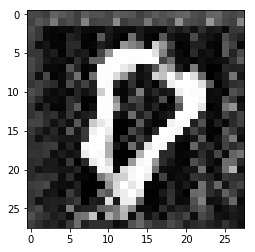

Epoch 2/2... Discriminator Loss: 1.0263... Generator Loss: 1.0497
Epoch 2/2... Discriminator Loss: 1.0676... Generator Loss: 1.6033
Epoch 2/2... Discriminator Loss: 0.9029... Generator Loss: 1.6837


In [88]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.5638... Generator Loss: 2.8648
Epoch 1/1... Discriminator Loss: 0.3670... Generator Loss: 3.3476
Epoch 1/1... Discriminator Loss: 3.6063... Generator Loss: 1.1957
Epoch 1/1... Discriminator Loss: 0.3710... Generator Loss: 2.9487
Epoch 1/1... Discriminator Loss: 0.2877... Generator Loss: 3.6578
Epoch 1/1... Discriminator Loss: 0.8471... Generator Loss: 2.8325
Epoch 1/1... Discriminator Loss: 0.3486... Generator Loss: 2.6702
Epoch 1/1... Discriminator Loss: 0.3355... Generator Loss: 3.1475
Epoch 1/1... Discriminator Loss: 0.3076... Generator Loss: 3.0777
Epoch 1/1... Discriminator Loss: 0.2589... Generator Loss: 3.8576


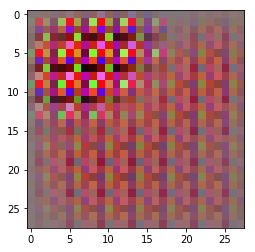

Epoch 1/1... Discriminator Loss: 1.4080... Generator Loss: 1.1371
Epoch 1/1... Discriminator Loss: 0.8012... Generator Loss: 2.5745
Epoch 1/1... Discriminator Loss: 0.6093... Generator Loss: 1.3300
Epoch 1/1... Discriminator Loss: 1.2152... Generator Loss: 0.7877
Epoch 1/1... Discriminator Loss: 1.2857... Generator Loss: 0.6163
Epoch 1/1... Discriminator Loss: 1.6686... Generator Loss: 2.7864
Epoch 1/1... Discriminator Loss: 1.6966... Generator Loss: 2.6949
Epoch 1/1... Discriminator Loss: 0.7504... Generator Loss: 2.2576
Epoch 1/1... Discriminator Loss: 0.6999... Generator Loss: 1.2457
Epoch 1/1... Discriminator Loss: 0.3302... Generator Loss: 2.5909


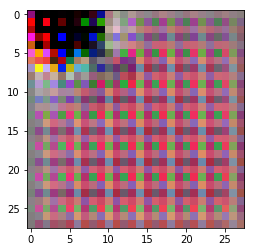

Epoch 1/1... Discriminator Loss: 0.3436... Generator Loss: 2.9187
Epoch 1/1... Discriminator Loss: 0.2918... Generator Loss: 3.5082
Epoch 1/1... Discriminator Loss: 1.6857... Generator Loss: 0.4095
Epoch 1/1... Discriminator Loss: 1.2294... Generator Loss: 1.9417
Epoch 1/1... Discriminator Loss: 0.6042... Generator Loss: 1.6129
Epoch 1/1... Discriminator Loss: 0.5432... Generator Loss: 1.6556
Epoch 1/1... Discriminator Loss: 0.4883... Generator Loss: 1.7428
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.5870
Epoch 1/1... Discriminator Loss: 0.4927... Generator Loss: 2.0493
Epoch 1/1... Discriminator Loss: 0.9591... Generator Loss: 1.0095


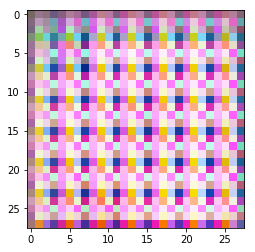

Epoch 1/1... Discriminator Loss: 0.9855... Generator Loss: 1.1598
Epoch 1/1... Discriminator Loss: 1.6395... Generator Loss: 2.5121
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 0.8567
Epoch 1/1... Discriminator Loss: 0.8695... Generator Loss: 1.1550
Epoch 1/1... Discriminator Loss: 0.7346... Generator Loss: 1.1605
Epoch 1/1... Discriminator Loss: 0.8060... Generator Loss: 1.3633
Epoch 1/1... Discriminator Loss: 0.4119... Generator Loss: 2.2045
Epoch 1/1... Discriminator Loss: 0.3472... Generator Loss: 2.3567
Epoch 1/1... Discriminator Loss: 1.2947... Generator Loss: 0.7553
Epoch 1/1... Discriminator Loss: 0.6062... Generator Loss: 1.7469


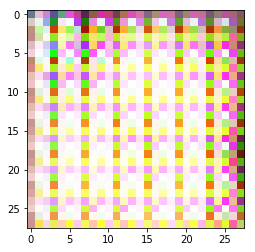

Epoch 1/1... Discriminator Loss: 0.5798... Generator Loss: 1.8152
Epoch 1/1... Discriminator Loss: 0.3659... Generator Loss: 2.5981
Epoch 1/1... Discriminator Loss: 0.2998... Generator Loss: 3.1159
Epoch 1/1... Discriminator Loss: 0.3053... Generator Loss: 2.6330
Epoch 1/1... Discriminator Loss: 1.1729... Generator Loss: 0.8374
Epoch 1/1... Discriminator Loss: 0.5087... Generator Loss: 1.4701
Epoch 1/1... Discriminator Loss: 1.5237... Generator Loss: 0.5627
Epoch 1/1... Discriminator Loss: 0.3849... Generator Loss: 2.7099
Epoch 1/1... Discriminator Loss: 0.3365... Generator Loss: 2.6834
Epoch 1/1... Discriminator Loss: 0.7377... Generator Loss: 3.2194


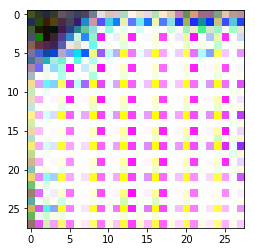

Epoch 1/1... Discriminator Loss: 4.2458... Generator Loss: 0.8961
Epoch 1/1... Discriminator Loss: 1.8946... Generator Loss: 1.3054
Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 1.2536
Epoch 1/1... Discriminator Loss: 0.5393... Generator Loss: 1.7533
Epoch 1/1... Discriminator Loss: 0.6025... Generator Loss: 1.6219
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 1.1648
Epoch 1/1... Discriminator Loss: 1.6631... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 0.4245... Generator Loss: 2.4910
Epoch 1/1... Discriminator Loss: 2.2655... Generator Loss: 0.3372
Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 0.5784


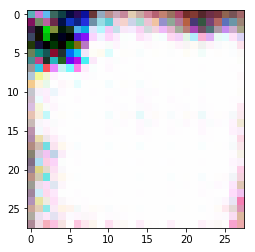

Epoch 1/1... Discriminator Loss: 2.3376... Generator Loss: 1.5536
Epoch 1/1... Discriminator Loss: 0.9350... Generator Loss: 0.8260
Epoch 1/1... Discriminator Loss: 1.1674... Generator Loss: 1.7565
Epoch 1/1... Discriminator Loss: 2.0672... Generator Loss: 0.6349
Epoch 1/1... Discriminator Loss: 0.9490... Generator Loss: 2.8212
Epoch 1/1... Discriminator Loss: 0.5557... Generator Loss: 1.6977
Epoch 1/1... Discriminator Loss: 0.5980... Generator Loss: 1.6921
Epoch 1/1... Discriminator Loss: 0.6625... Generator Loss: 1.4365
Epoch 1/1... Discriminator Loss: 0.2552... Generator Loss: 3.1327
Epoch 1/1... Discriminator Loss: 0.3027... Generator Loss: 2.8797


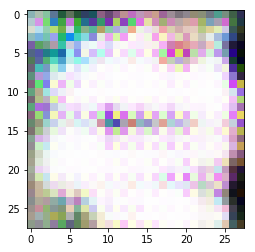

Epoch 1/1... Discriminator Loss: 1.0920... Generator Loss: 0.8730
Epoch 1/1... Discriminator Loss: 2.7611... Generator Loss: 0.9855
Epoch 1/1... Discriminator Loss: 1.5110... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.9177
Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 0.7989
Epoch 1/1... Discriminator Loss: 1.2470... Generator Loss: 0.9082
Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.8505
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.8106
Epoch 1/1... Discriminator Loss: 1.6518... Generator Loss: 0.8459
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.8442


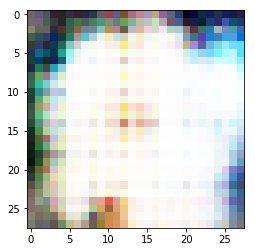

Epoch 1/1... Discriminator Loss: 1.3539... Generator Loss: 0.8933
Epoch 1/1... Discriminator Loss: 1.3042... Generator Loss: 0.8458
Epoch 1/1... Discriminator Loss: 3.1251... Generator Loss: 1.1783
Epoch 1/1... Discriminator Loss: 1.5817... Generator Loss: 0.8187
Epoch 1/1... Discriminator Loss: 1.4659... Generator Loss: 0.8809
Epoch 1/1... Discriminator Loss: 1.4090... Generator Loss: 0.8251
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.7310
Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 0.8206
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.7331
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 0.7583


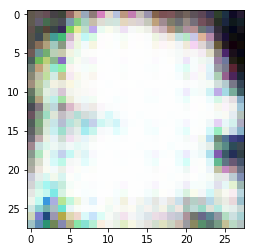

Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.7729
Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.7777
Epoch 1/1... Discriminator Loss: 1.3511... Generator Loss: 0.8196
Epoch 1/1... Discriminator Loss: 1.3677... Generator Loss: 0.7904
Epoch 1/1... Discriminator Loss: 1.3337... Generator Loss: 0.8208
Epoch 1/1... Discriminator Loss: 1.3513... Generator Loss: 0.8029
Epoch 1/1... Discriminator Loss: 1.3320... Generator Loss: 0.8369
Epoch 1/1... Discriminator Loss: 1.3378... Generator Loss: 0.8391
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.8245


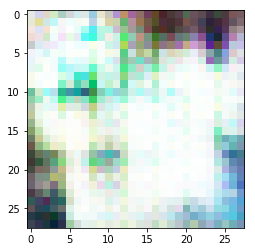

Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 1.3010... Generator Loss: 0.8473
Epoch 1/1... Discriminator Loss: 1.2739... Generator Loss: 0.9040
Epoch 1/1... Discriminator Loss: 1.2927... Generator Loss: 0.8060
Epoch 1/1... Discriminator Loss: 1.2850... Generator Loss: 0.9049
Epoch 1/1... Discriminator Loss: 1.2955... Generator Loss: 0.8206
Epoch 1/1... Discriminator Loss: 1.2925... Generator Loss: 0.9098
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.8634
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.8126
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.7435


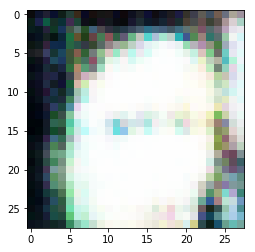

Epoch 1/1... Discriminator Loss: 1.3260... Generator Loss: 0.7689
Epoch 1/1... Discriminator Loss: 1.2716... Generator Loss: 0.8393
Epoch 1/1... Discriminator Loss: 1.3111... Generator Loss: 0.8823
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.8308
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 0.8144
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.8211
Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 0.7631
Epoch 1/1... Discriminator Loss: 1.3035... Generator Loss: 0.7781
Epoch 1/1... Discriminator Loss: 1.2204... Generator Loss: 1.0647
Epoch 1/1... Discriminator Loss: 1.8829... Generator Loss: 0.9236


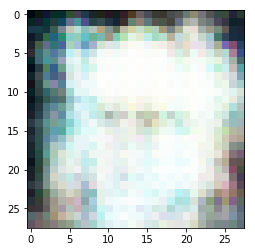

Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.7620
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 0.7916
Epoch 1/1... Discriminator Loss: 1.3363... Generator Loss: 0.7485
Epoch 1/1... Discriminator Loss: 1.3089... Generator Loss: 0.7663
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.7417
Epoch 1/1... Discriminator Loss: 1.3150... Generator Loss: 0.7405
Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.8128
Epoch 1/1... Discriminator Loss: 1.3024... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.7715
Epoch 1/1... Discriminator Loss: 1.3081... Generator Loss: 0.7638


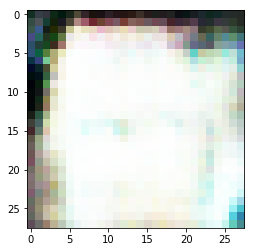

Epoch 1/1... Discriminator Loss: 1.3106... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 1.3319... Generator Loss: 0.8542
Epoch 1/1... Discriminator Loss: 1.3057... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.8035
Epoch 1/1... Discriminator Loss: 1.3308... Generator Loss: 0.8560
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.7369
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 0.7897
Epoch 1/1... Discriminator Loss: 1.4216... Generator Loss: 0.6956
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 0.7330


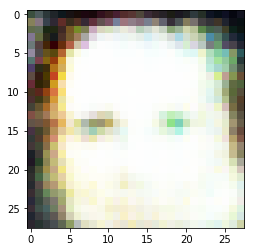

Epoch 1/1... Discriminator Loss: 1.3461... Generator Loss: 0.7239
Epoch 1/1... Discriminator Loss: 1.3262... Generator Loss: 0.7537
Epoch 1/1... Discriminator Loss: 1.3373... Generator Loss: 0.7497
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.7631
Epoch 1/1... Discriminator Loss: 1.3428... Generator Loss: 0.7201
Epoch 1/1... Discriminator Loss: 1.2811... Generator Loss: 0.7543
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.7643
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 0.7793
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.9054
Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.7306


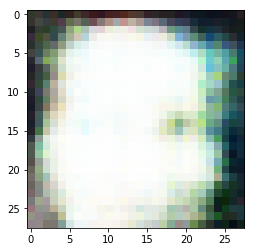

Epoch 1/1... Discriminator Loss: 1.2839... Generator Loss: 0.7562
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.7392
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.6694
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 1.3258... Generator Loss: 0.8346
Epoch 1/1... Discriminator Loss: 1.3946... Generator Loss: 0.8058
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.7531
Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 0.8900
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.7324
Epoch 1/1... Discriminator Loss: 2.0142... Generator Loss: 0.8486


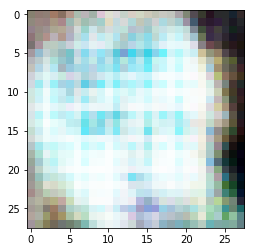

Epoch 1/1... Discriminator Loss: 1.4298... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 1.4115... Generator Loss: 0.8214
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.7234
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.7755
Epoch 1/1... Discriminator Loss: 1.3370... Generator Loss: 0.7509
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.7694


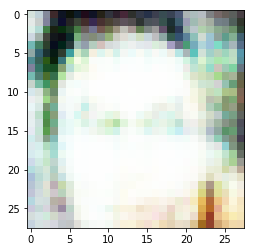

Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 0.7383
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.7021
Epoch 1/1... Discriminator Loss: 1.3440... Generator Loss: 0.7173
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.7138
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.7327
Epoch 1/1... Discriminator Loss: 1.4054... Generator Loss: 0.6429
Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.8272
Epoch 1/1... Discriminator Loss: 1.3229... Generator Loss: 0.7932
Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.7911


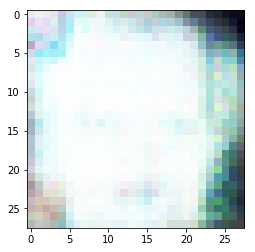

Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 0.8040
Epoch 1/1... Discriminator Loss: 1.3395... Generator Loss: 0.7791
Epoch 1/1... Discriminator Loss: 1.1484... Generator Loss: 0.9605
Epoch 1/1... Discriminator Loss: 1.5329... Generator Loss: 0.7432
Epoch 1/1... Discriminator Loss: 1.4954... Generator Loss: 0.7254
Epoch 1/1... Discriminator Loss: 1.4280... Generator Loss: 0.7239
Epoch 1/1... Discriminator Loss: 1.4062... Generator Loss: 0.7928
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.7343
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.6540


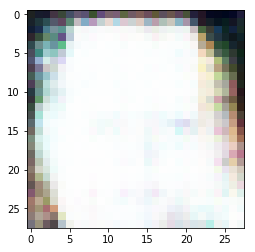

Epoch 1/1... Discriminator Loss: 1.3565... Generator Loss: 0.7442
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.7145
Epoch 1/1... Discriminator Loss: 1.3503... Generator Loss: 0.7474
Epoch 1/1... Discriminator Loss: 1.3389... Generator Loss: 0.7131
Epoch 1/1... Discriminator Loss: 1.3490... Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.7514
Epoch 1/1... Discriminator Loss: 1.3406... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 1.2997... Generator Loss: 0.8254
Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.9342


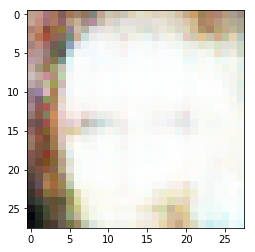

Epoch 1/1... Discriminator Loss: 1.3607... Generator Loss: 0.8228
Epoch 1/1... Discriminator Loss: 1.3650... Generator Loss: 0.6489
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.8102
Epoch 1/1... Discriminator Loss: 1.3438... Generator Loss: 0.7341
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.7027
Epoch 1/1... Discriminator Loss: 1.4393... Generator Loss: 0.6032
Epoch 1/1... Discriminator Loss: 1.3248... Generator Loss: 0.6721
Epoch 1/1... Discriminator Loss: 1.4080... Generator Loss: 0.5999
Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.6732


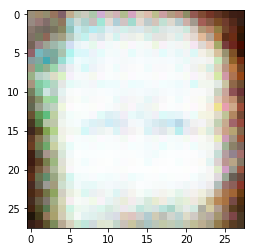

Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.7557
Epoch 1/1... Discriminator Loss: 1.5395... Generator Loss: 0.4521
Epoch 1/1... Discriminator Loss: 2.3590... Generator Loss: 0.6105
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.8221
Epoch 1/1... Discriminator Loss: 1.4436... Generator Loss: 0.8322
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.6660
Epoch 1/1... Discriminator Loss: 1.4387... Generator Loss: 0.8056
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.7796
Epoch 1/1... Discriminator Loss: 1.3900... Generator Loss: 0.7526
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.7405


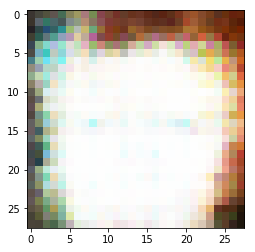

Epoch 1/1... Discriminator Loss: 1.3859... Generator Loss: 0.7377
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.7230
Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 1.3856... Generator Loss: 0.7424
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.7777
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.7048
Epoch 1/1... Discriminator Loss: 1.4011... Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.7265
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.7767
Epoch 1/1... Discriminator Loss: 1.3807... Generator Loss: 0.7271


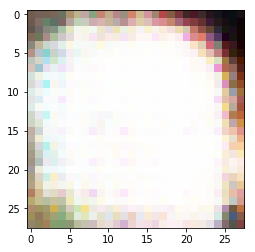

Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.7279
Epoch 1/1... Discriminator Loss: 1.3973... Generator Loss: 0.7485
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.7516
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.6654
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.7676
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.7578
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.7295
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.7428


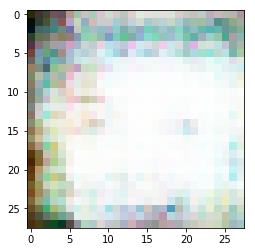

Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.7029
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.7519
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.7743
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.7375
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.7421
Epoch 1/1... Discriminator Loss: 1.3658... Generator Loss: 0.7822
Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 0.7541
Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 0.7537
Epoch 1/1... Discriminator Loss: 1.3720... Generator Loss: 0.7536
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.7425


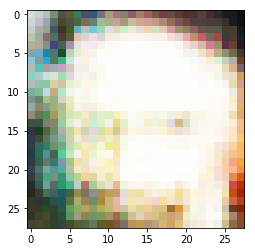

Epoch 1/1... Discriminator Loss: 1.3838... Generator Loss: 0.7371
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.7321
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.7516
Epoch 1/1... Discriminator Loss: 1.3547... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.8131
Epoch 1/1... Discriminator Loss: 1.3515... Generator Loss: 0.7552
Epoch 1/1... Discriminator Loss: 1.3506... Generator Loss: 0.7836
Epoch 1/1... Discriminator Loss: 1.3347... Generator Loss: 0.7463
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.7503


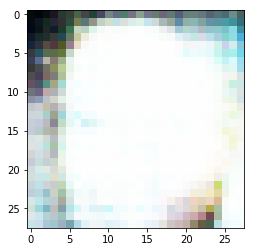

Epoch 1/1... Discriminator Loss: 1.2166... Generator Loss: 0.8805
Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.7100
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.7282
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.7432
Epoch 1/1... Discriminator Loss: 1.3364... Generator Loss: 0.7842
Epoch 1/1... Discriminator Loss: 1.3325... Generator Loss: 0.7343
Epoch 1/1... Discriminator Loss: 1.3536... Generator Loss: 0.7359
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 0.8851
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 1.1442
Epoch 1/1... Discriminator Loss: 1.2780... Generator Loss: 0.6459


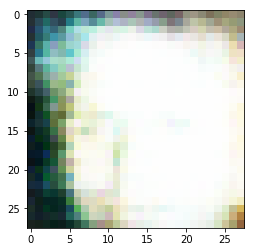

Epoch 1/1... Discriminator Loss: 1.4970... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.3724... Generator Loss: 0.7642
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.7234
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.6976
Epoch 1/1... Discriminator Loss: 1.3658... Generator Loss: 0.7094
Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.7248
Epoch 1/1... Discriminator Loss: 1.3640... Generator Loss: 0.7930
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.7607
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.8587
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.7448


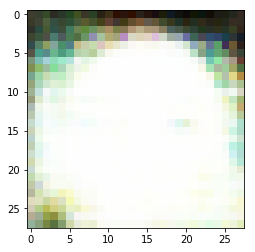

Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.7112
Epoch 1/1... Discriminator Loss: 1.6968... Generator Loss: 1.1977
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.7120
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.7546
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.7598
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.7439
Epoch 1/1... Discriminator Loss: 1.3344... Generator Loss: 0.7448
Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.8594
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 0.8219
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.7511


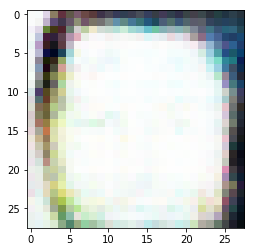

Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.7112
Epoch 1/1... Discriminator Loss: 1.3378... Generator Loss: 0.8301
Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 0.8083
Epoch 1/1... Discriminator Loss: 3.3665... Generator Loss: 1.3721
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.8562
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.7520
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.7627
Epoch 1/1... Discriminator Loss: 1.3602... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.7168


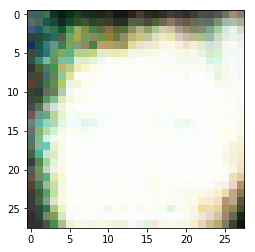

Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.7322
Epoch 1/1... Discriminator Loss: 1.3467... Generator Loss: 0.7183
Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.7628
Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 1.0462
Epoch 1/1... Discriminator Loss: 1.4805... Generator Loss: 0.9627
Epoch 1/1... Discriminator Loss: 1.2612... Generator Loss: 0.8541
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 1.2550... Generator Loss: 0.9309
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 0.5569
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.6484


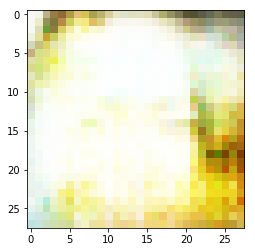

Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.7681
Epoch 1/1... Discriminator Loss: 1.3633... Generator Loss: 0.7008
Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.7214
Epoch 1/1... Discriminator Loss: 1.3518... Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.7250


In [90]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.01


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.